![example](images/director_shot.jpeg)

# Microsoft Film Analysis 

**Author:** Alex Muturi
***

## Introduction
This project seeks to provide understanding and derive insight from a collection of datasets with information about films. The business problem is to give the stakeholder an informed point of entry into the film making businesss. The non-commercial datasets used are sourced IMDB's developer website among other sources. I use python to load, clean, and analyse the information with three (3) specific questions in mind:
1. What are the most Popular Genres? 
2. Which Genres have the highest monetary returns?
3. Does a higher production budget translate to higher returns?

I use visualization graphically present the findings and make conclusions bassed off of the business problem. I then make reccomendations based on results of my analysis.

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

In [3]:
#Read the data and save into respective dataframes
basics_df = pd.read_csv ("zippedData/title.basics.csv")
ratings_df = pd.read_csv("zippedData/title.ratings.csv")
movie_gross_df =  pd.read_csv("zippedData/bom.movie_gross.csv")
roi_df = pd.read_csv("zippedData/tn.movie_budgets.csv")


## Exploratory Data Analysis
***
This section covers loading the datasets and looking through each to gain a high level understanding of each. 

### Previewing each DataFrame
This will help us understand columns of each table, the number of rows in each and what each row represents


In [4]:
# find out number of columns and rows
basics_df.shape 

(146144, 6)

In [5]:
#display the top 5 observations of the dataset 
basics_df.head() 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In the basics table, each row represents a  Title/Film with the following characteristics:
* Unique identifier
* Original and Primary(Popular) Titles
* Start year and the runtime  
* Genre/Category

In [6]:
#display the last 5 observations of the basics_df 
basics_df.tail() 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [7]:
#check the shape of ratings_df
ratings_df.shape

(73856, 3)

In [8]:
# preview the first 5 rows
ratings_df.head() 

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In the ratings table, each row represents a Title's average rating and the number of votes that led to the said rating.

In [9]:
#preview the first 5 rows of movie_gross_df
movie_gross_df.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Each row in this table represents a title's name, the studio, Domestic and Foreign earnings as well as the year the film was released

In [10]:
#preview the last 5 rows 
movie_gross_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


*there is a notably high number of NaN values in the foreign_gross column. This will be addressed in the data praparation step*

In [11]:
#merge basic_df and ratings_df as info is highly related. 
combined_df = basics_df.merge(ratings_df, on='tconst')
combined_df.shape

(73856, 8)

## Data Preparation

This section presents the process of cleaning data with reasoning for each decision provided in either code comments or a markdown cell after the output.

In [12]:
#view sample records from the combined DataFrame
combined_df.sample(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
54518,tt5520970,Cutie Honey: Tears,Cutie Honey: Tears,2016,92.0,"Action,Sci-Fi",5.0,142
28909,tt2788228,Marry Me,Trouw met mij,2014,94.0,Comedy,5.7,224
70687,tt8408458,Punasii päin,Punasii päin,2018,90.0,Crime,6.9,36
57355,tt5880942,Bloody Forest,Bloody Forest,2016,66.0,"Drama,Horror,Thriller",1.4,22
54810,tt5559528,Maanagaram,Maanagaram,2017,137.0,"Action,Thriller",8.1,2485


In [13]:
#Get info about columns, their data types and number of values in each
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [14]:
#Check for duplicated rows: 
print("Duplicate rows:", combined_df.duplicated().sum())


Duplicate rows: 0


In [15]:
#check for null values in the columns and their percentages 
def null_percentages (data_frame): 
    null_values = data_frame.isnull().sum()
    percentage_null = data_frame.isnull().sum()/(len (data_frame)) * 100
    return pd.concat([null_values, percentage_null],
                      axis=1, 
                      keys=['Values', 'Null Percentage'])



In [16]:
null_percentages(combined_df)

,Values,Null Percentage
tconst,0,0.000000
primary_title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
runtime_minutes,7620,10.317374
genres,804,1.088605
averagerating,0,0.000000
numvotes,0,0.000000


runtime_minutes apppears to have 10% missing values. 
Start by addressing the missing values in that column

Runtime Minutes Descriptive Statistics:
count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64


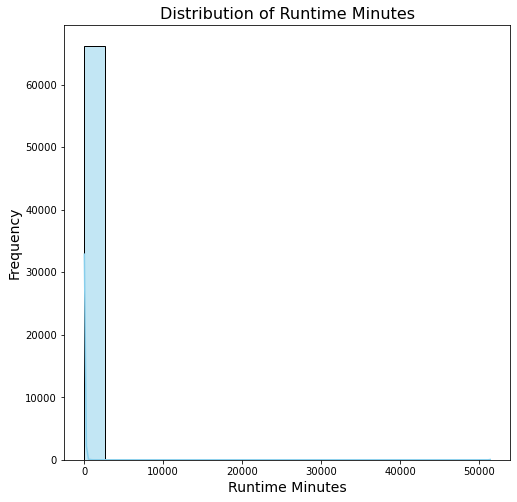

In [17]:
#Plot and stats to understand the distribution of the column

print("Runtime Minutes Descriptive Statistics:")
print(combined_df['runtime_minutes'].describe())

plt.figure(figsize=(8, 8)) 

sns.histplot(data=combined_df, x='runtime_minutes', bins=20, kde=True, color='skyblue')

plt.title('Distribution of Runtime Minutes', fontsize=16)
plt.xlabel('Runtime Minutes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

### Handling Missing Values 

#### a). runtime_minutes column
Handling missing values by filling in with a measure of central tendency because:
 * *With the data being heavily skewed, imputing the missing values using the mean would distort the initital distribution*
 * *Dropping the values would lead to loss of over 10% of the rows which contains data from other columns*


In [18]:
#Fill missing values using the median in a new column. 
combined_df['runtime_minutes'] = combined_df['runtime_minutes'].fillna(
    combined_df['runtime_minutes'].median()
    )
print("Number of rows left with null values: ",
      combined_df['runtime_minutes'].isnull().sum())

Number of rows left with null values:  0


#### b). genres column

From the analysis above, 804 values were missing in the **Genres** column, translating to ~1%. \
Dropping these rows is unlikely to have a significant impact on the of the data. 

In [19]:
#Drop rows that contain null values in the Genres column
combined_df = combined_df.dropna(subset=['genres'], axis=0)
combined_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [20]:
#check again for null values and their percentages
null_values = combined_df.isnull().sum()
percentage_null = combined_df.isnull().sum()/(len (combined_df)) * 100
pd.concat([null_values, percentage_null], 
          axis=1, 
          keys=['Values', 
                'Null Percentage'])

,Values,Null Percentage
tconst,0,0.0
primary_title,0,0.0
original_title,0,0.0
start_year,0,0.0
runtime_minutes,0,0.0
genres,0,0.0
averagerating,0,0.0
numvotes,0,0.0


### Handling outliers

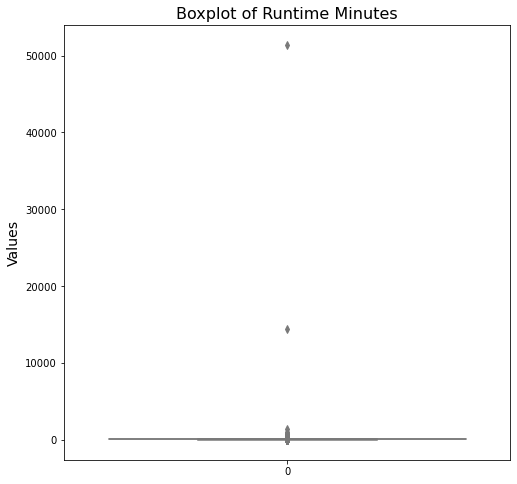

Skewness value: 241.43892669427055


In [21]:
#check for outliers using boxplot and skew() method

plt.figure(figsize=(8, 8)) 

boxplot = sns.boxplot(data=combined_df['runtime_minutes'], color='lightblue')

plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of Runtime Minutes', fontsize=16)

plt.show()

# Calculate and print the skewness value
skewness = combined_df['runtime_minutes'].skew()
print("Skewness value:", skewness)

From the shape of the boxplot above, extreme outliers appear present.\
A heavy skew value of +242 suggests the same

##### a). Outlier Treatment by Trimming

In [22]:
#Remove the outliers below the 1st percentile and beyond the 9th percentile 
p1 = int(combined_df['runtime_minutes'].quantile( q = .10))
p9 = int(combined_df['runtime_minutes'].quantile( q = .90))

index = combined_df [(combined_df['runtime_minutes'] > p9 )|
                     (combined_df['runtime_minutes'] < p1)].index

print("Total number of rows outside (1st - 9th) percentile range ", len(index))

Total number of rows outside (1st - 9th) percentile range  13147


That's a lot of rows to drop, so we'll try another method

##### b). Outlier Treatment by Replacing with median values

In [23]:
#find the median 
median_value = combined_df['runtime_minutes'].median() 

#replace outliers with median value
combined_df['runtime_minutes'] = np.where(combined_df['runtime_minutes'] < p1,
                                            median_value,
                                            combined_df['runtime_minutes'] )
combined_df['runtime_minutes'] = np.where(combined_df['runtime_minutes']> p9,
                                            median_value,
                                            combined_df['runtime_minutes'] )



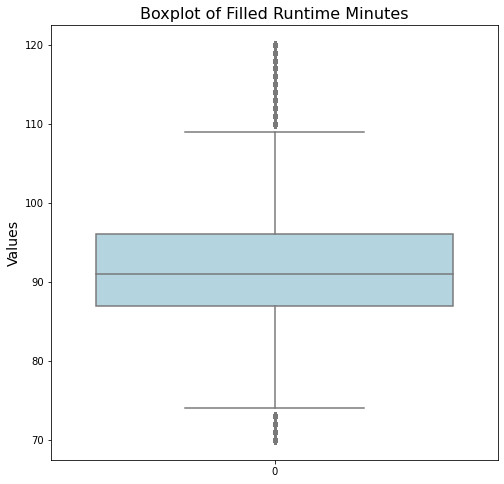

Skewness value: 0.48308825221684354


In [24]:
#check again for outliers using boxplot and skew() method
plt.figure(figsize=(8, 8))  

boxplot = sns.boxplot(data=combined_df['runtime_minutes'], color='lightblue')

plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of Filled Runtime Minutes', fontsize=16)

plt.show()

# Calculate and print the skewness value
skewness = combined_df['runtime_minutes'].skew()
print("Skewness value:", skewness)

Runtime Minutes Descriptive Statistics:
count    73052.000000
mean        92.069170
std         10.187417
min         70.000000
25%         87.000000
50%         91.000000
75%         96.000000
max        120.000000
Name: runtime_minutes, dtype: float64


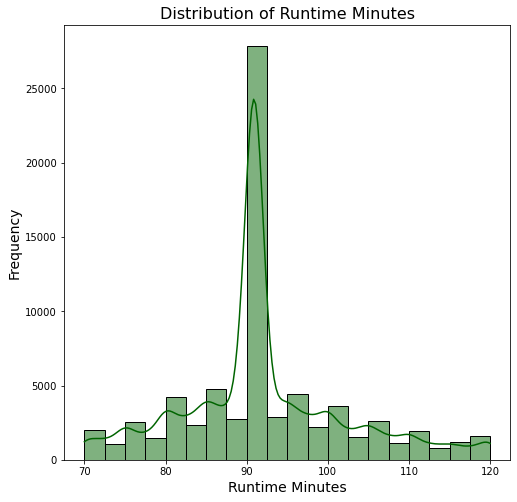

In [25]:
# re-check distribution of values in the column

print("Runtime Minutes Descriptive Statistics:")
print(combined_df['runtime_minutes'].describe())

plt.figure(figsize=(8, 8)) 

sns.histplot(data=combined_df, x='runtime_minutes', bins=20, kde=True, color='darkgreen')

plt.title('Distribution of Runtime Minutes', fontsize=16)
plt.xlabel('Runtime Minutes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

## Question 1: What are the most Popular Genres? 

In [26]:
#group by genres
grouped_by_genre = combined_df.groupby("genres", as_index=False)


In [27]:
#explore the resulting groups
grouped_by_genre['numvotes'].sum()

,genres,numvotes
0,Action,329057
1,"Action,Adult,Comedy",36
2,"Action,Adventure",109011
3,"Action,Adventure,Animation",3570543
4,"Action,Adventure,Biography",999701
...,...,...
918,Thriller,440564
919,"Thriller,War",7166
920,"Thriller,Western",13288
921,War,5535


In [28]:
#Find top 5 genres by number of votes
best_genre_by_numvotes = grouped_by_genre['numvotes'].sum().sort_values(
    by='numvotes',  
    ascending=False
    )[:5]
best_genre_by_numvotes 

,genres,numvotes
17,"Action,Adventure,Sci-Fi",23023248
10,"Action,Adventure,Fantasy",9658883
157,"Adventure,Animation,Comedy",8687435
693,Drama,8395521
472,"Comedy,Drama,Romance",7665463


In [29]:
# Find top 5 genres by average rating
best_genre_by_avrating = grouped_by_genre['averagerating'].sum().sort_values(
    by = 'averagerating', 
    ascending=False)[:5]
best_genre_by_avrating

,genres,averagerating
693,Drama,75411.4
612,Documentary,75220.9
431,Comedy,32431.9
462,"Comedy,Drama",16654.9
856,Horror,13017.1


In [30]:
#add each item in the above genres to a list
top_genres = []
def splitter(series):
    for item in series['genres']:
        top_genres.extend(item.split(","))


# splitter


splitter(best_genre_by_numvotes)
splitter(best_genre_by_avrating)
# type(best_genre_by_numvotes['genres'])
# print (best_genre_by_numvotes)

# top_genres = [genre for genre in best_genre_by_numvotes['genre'].split(",")]
top_genres


['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Animation',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Drama',
 'Horror']

In [31]:
#find genres that appear most frequently in the list

def plot_bar_graph(top_genres):
    # Count the occurrences of each genre in the list
    genre_counts = Counter(top_genres)
    
    # Get the unique genres and their corresponding frequencies
    genres, frequencies = zip(*genre_counts.items())
    
    # Create the bar graph with specified figure size (8x8 inches)
    plt.figure(figsize=(8, 8))
    
    # Plot the bar graph
    plt.bar(genres, frequencies, alpha=0.7)
    
    # Set x-axis label to be slanted and improve readability
    plt.xticks(rotation=45, ha='right')
    
    plt.xlabel("Genres")
    plt.ylabel("Relative Popularity")
    plt.title("Bar Graph of Top 5 Most Popular Genres by Weighted Rating")
    
    # Adjust the layout to avoid cutting off labels
    plt.tight_layout()
    
    plt.show()





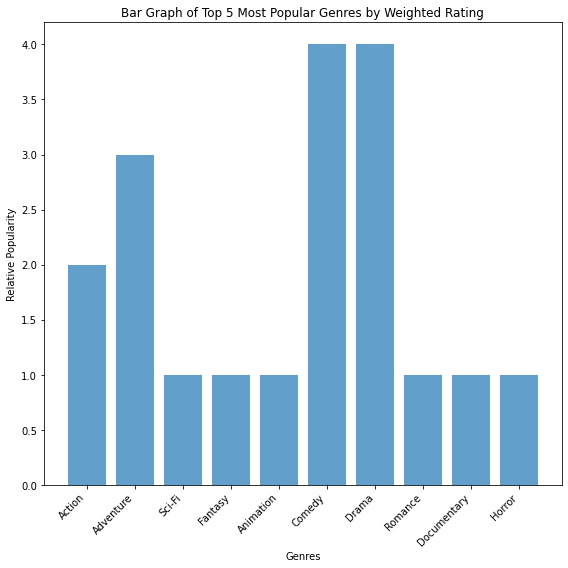

In [32]:
plot_bar_graph (top_genres)

From the Analysis above, Microsoft should consider creating films in the Comedy and Drama genres, followed by Adventure and Action 

## Question 2: Which Genres have the highest monetary returns?

In [33]:
#preview movie gross df 
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [34]:
#find null percentages 
null_percentages(movie_gross_df)

,Values,Null Percentage
title,0,0.000000
studio,5,0.147623
domestic_gross,28,0.826690
foreign_gross,1350,39.858282
year,0,0.000000


In [35]:
#drop unneeded columns
#foreign_gross will be preserved for use later despite high NaN percentage
movie_gross_df.drop(['studio', 'year'], 
                    axis=1, 
                    inplace= True)
movie_gross_df

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000
...,...,...,...
3382,The Quake,6200.0,NaN
3383,Edward II (2018 re-release),4800.0,NaN
3384,El Pacto,2500.0,NaN
3385,The Swan,2400.0,NaN


In [36]:
#merge with basics df 
returns_df = movie_gross_df.merge(basics_df, 
                                  left_on= "title", 
                                  right_on= "primary_title")
returns_df.sample(10)

,title,domestic_gross,foreign_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2008,Little Boy,6500000.0,NaN,tt1810683,Little Boy,Little Boy,2015,106.0,"Drama,History,War"
2527,The Music of Strangers,1200000.0,NaN,tt3549206,The Music of Strangers,The Music of Strangers,2015,96.0,"Documentary,Music"
537,Brighton Rock,230000.0,1600000,tt1233192,Brighton Rock,Brighton Rock,2010,111.0,"Crime,Drama,Thriller"
331,Source Code,54700000.0,92600000,tt0945513,Source Code,Source Code,2011,93.0,"Action,Drama,Sci-Fi"
2511,The Dressmaker,2000000.0,NaN,tt2910904,The Dressmaker,The Dressmaker,2015,119.0,"Comedy,Drama"
553,Meek's Cutoff,978000.0,NaN,tt1518812,Meek's Cutoff,Meek's Cutoff,2010,104.0,"Drama,Western"
2486,Denial,4099999.0,NaN,tt5897002,Denial,Denial,2016,93.0,Documentary
6,Despicable Me,251500000.0,291600000,tt1323594,Despicable Me,Despicable Me,2010,95.0,"Animation,Comedy,Family"
2697,The Other Side,8100.0,NaN,tt4942986,The Other Side,The Other Side,2016,NaN,Drama
2577,The Invitation,232000.0,NaN,tt2400463,The Invitation,The Invitation,2015,100.0,"Drama,Horror,Mystery"


In [37]:
#drop unneeded columns in the new DataFrame
returns_df.drop(['tconst', 'original_title' ,'start_year', 'runtime_minutes'], 
                axis=1, 
                inplace=True)
returns_df.sample(10)

,title,domestic_gross,foreign_gross,primary_title,genres
1301,Disconnect,1400000.0,NaN,Disconnect,"Comedy,Romance"
1521,The Legend of Hercules,18800000.0,42400000,The Legend of Hercules,"Action,Adventure,Fantasy"
573,Kaboom,119000.0,421000,Kaboom,"Comedy,Mystery,Romance"
2985,The Journey,155000.0,NaN,The Journey,"Documentary,Sport"
2213,Court,22900.0,NaN,Court,Drama
937,Once Upon a Time in Anatolia,152000.0,1000000,Once Upon a Time in Anatolia,"Crime,Drama"
2866,Earth: One Amazing Day,81300.0,11600000,Earth: One Amazing Day,"Documentary,Family"
2793,Monster Trucks,33400000.0,31100000,Monster Trucks,"Action,Adventure,Comedy"
228,Life During Wartime,281000.0,487000,Life During Wartime,"Documentary,History"
2413,Free State of Jones,20800000.0,4200000,Free State of Jones,"Action,Biography,Drama"


In [38]:
#check for duplicates
returns_df[returns_df.duplicated() == True]

,title,domestic_gross,foreign_gross,primary_title,genres
40,Red,90400000.0,108600000,Red,Drama
47,Unstoppable,81600000.0,86200000,Unstoppable,Documentary
49,Unstoppable,81600000.0,86200000,Unstoppable,Documentary
50,Unstoppable,81600000.0,86200000,Unstoppable,Documentary
164,Conviction,6800000.0,2900000,Conviction,Drama
...,...,...,...,...,...
3302,The Guardians,177000.0,NaN,The Guardians,Documentary
3320,In Between,108000.0,NaN,In Between,Drama
3328,Custody,83900.0,NaN,Custody,Drama
3357,The Escape,14000.0,NaN,The Escape,Drama


In [39]:
#drop duplicates
returns_df.drop_duplicates( inplace=True)

In [40]:
#check again for null percentages 
null_percentages(returns_df)


,Values,Null Percentage
title,0,0.000000
domestic_gross,23,0.703364
foreign_gross,1290,39.449541
primary_title,0,0.000000
genres,37,1.131498


In [41]:
#drop null values
returns_df.dropna(subset=['domestic_gross', 'genres'], 
                  axis=0, 
                  inplace=True)
returns_df


,title,domestic_gross,foreign_gross,primary_title,genres
0,Toy Story 3,415000000.0,652000000,Toy Story 3,"Adventure,Animation,Comedy"
1,Inception,292600000.0,535700000,Inception,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,238700000.0,513900000,Shrek Forever After,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,300500000.0,398000000,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy"
4,Iron Man 2,312400000.0,311500000,Iron Man 2,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
3361,Souvenir,11400.0,NaN,Souvenir,"Comedy,Romance"
3362,Souvenir,11400.0,NaN,Souvenir,Documentary
3363,Beauty and the Dogs,8900.0,NaN,Beauty and the Dogs,"Crime,Drama,Thriller"
3364,The Quake,6200.0,NaN,The Quake,"Action,Drama,Thriller"


In [42]:
#group by genres
gross_by_genre = returns_df.groupby("genres", as_index=False)
gross_by_genre.head()


,title,domestic_gross,foreign_gross,primary_title,genres
0,Toy Story 3,415000000.0,652000000,Toy Story 3,"Adventure,Animation,Comedy"
1,Inception,292600000.0,535700000,Inception,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,238700000.0,513900000,Shrek Forever After,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,300500000.0,398000000,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy"
4,Iron Man 2,312400000.0,311500000,Iron Man 2,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
3332,Tehran Taboo,74800.0,NaN,Tehran Taboo,"Animation,Drama"
3338,Before We Vanish,52100.0,NaN,Before We Vanish,"Drama,Sci-Fi"
3347,The Workshop,22100.0,NaN,The Workshop,"Documentary,Family"
3350,Loving Pablo,22000.0,NaN,Loving Pablo,"Action,Biography,Crime"


In [43]:
# Find top 5 earning genres 
top5_by_gross = gross_by_genre['domestic_gross'].sum().sort_values(by="domestic_gross", 
                                                                   ascending=False
                                                                   )[:10]
top5_by_gross



,genres,domestic_gross
13,"Action,Adventure,Sci-Fi",1.102470e+10
81,"Adventure,Animation,Comedy",9.645133e+09
9,"Action,Adventure,Fantasy",4.378787e+09
254,Drama,3.747715e+09
4,"Action,Adventure,Comedy",3.172472e+09
168,Comedy,2.665186e+09
233,Documentary,2.644667e+09
2,"Action,Adventure,Animation",2.184660e+09
187,"Comedy,Drama,Romance",1.891657e+09
14,"Action,Adventure,Thriller",1.851798e+09


In [44]:
#add each item in the above genres to a list
top_genres = []

splitter(top5_by_gross)

top_genres

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Comedy',
 'Documentary',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Drama',
 'Romance',
 'Action',
 'Adventure',
 'Thriller']

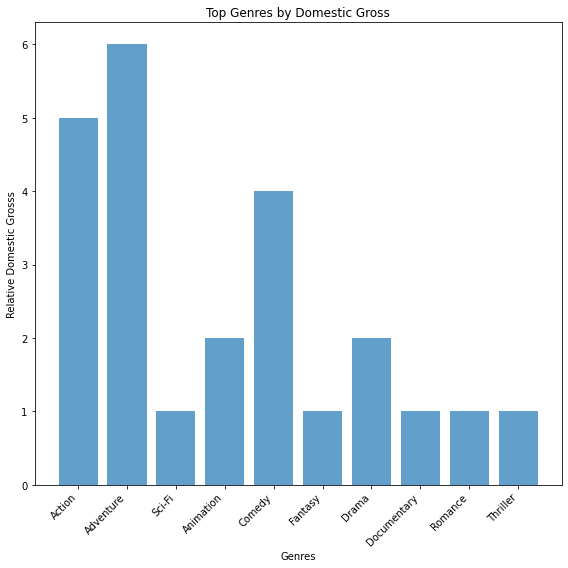

In [45]:
#find genres that appear most frequently in the list

def plot_bar_graph(top_genres):
    # Count the occurrences of each genre in the list
    genre_counts = Counter(top_genres)
    
    # Get the unique genres and their corresponding frequencies
    genres, frequencies = zip(*genre_counts.items())
    
    # Create the bar graph with specified figure size (8x8 inches)
    plt.figure(figsize=(8, 8))
    
    # Plot the bar graph
    plt.bar(genres, frequencies, alpha=0.7)
    
    # Set x-axis label to be slanted and improve readability
    plt.xticks(rotation=45, ha='right')
    
    plt.xlabel("Genres")
    plt.ylabel("Relative Domestic Grosss")
    plt.title("Top Genres by Domestic Gross")
    
    # Adjust the layout to avoid cutting off labels
    plt.tight_layout()
    
    plt.show()

plot_bar_graph (top_genres)

From the analysis, Microsoft should consider creating films in Adventure, Action, Comedy and Drama.

## Question 3: Does a higher production budget translate to higher returns?

In [46]:
roi_df.sample(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2281,82,"Jun 3, 2005",The Lords of Dogtown,"$25,000,000","$11,273,517","$13,424,365"
3804,5,"Dec 25, 2018",Destroyer,"$9,000,000","$1,533,324","$3,681,096"
5651,52,"Jun 30, 1979",Dolphin,"$170,000","$14,000","$14,000"
184,85,"Jul 24, 2009",G-Force,"$150,000,000","$119,436,770","$292,817,841"
558,59,"Feb 14, 2003",Daredevil,"$80,000,000","$102,543,518","$182,782,518"
693,94,"Jun 9, 2006",Cars,"$70,000,000","$244,082,982","$461,651,246"
3949,50,"Jul 4, 2003",Swimming Pool,"$7,800,000","$10,130,108","$24,021,282"
5202,3,"Mar 7, 2017",Departure,"$1,100,000",$0,"$27,561"
3004,5,"Dec 18, 1985",The Color Purple,"$15,000,000","$93,589,701","$93,589,701"
2786,87,"Oct 10, 1986",Peggy Sue Got Married,"$18,000,000","$41,382,841","$41,382,841"


In [47]:
#check null counts for each column
roi_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [48]:
#check column data types
roi_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [49]:

#handle ','-separated currency, remove '$' sign and convert to float 

roi_df[['production_budget',
        'domestic_gross', 
        'worldwide_gross']] = roi_df[['production_budget',                                     
                                      'domestic_gross', 
                                      'worldwide_gross']].apply(lambda row: row.apply(
                                          lambda x: float(str(x).replace(',', '').replace('$', ''))),
                                                 axis = 1
                                                 )

In [53]:
roi_df = roi_df[['production_budget', 'worldwide_gross']]

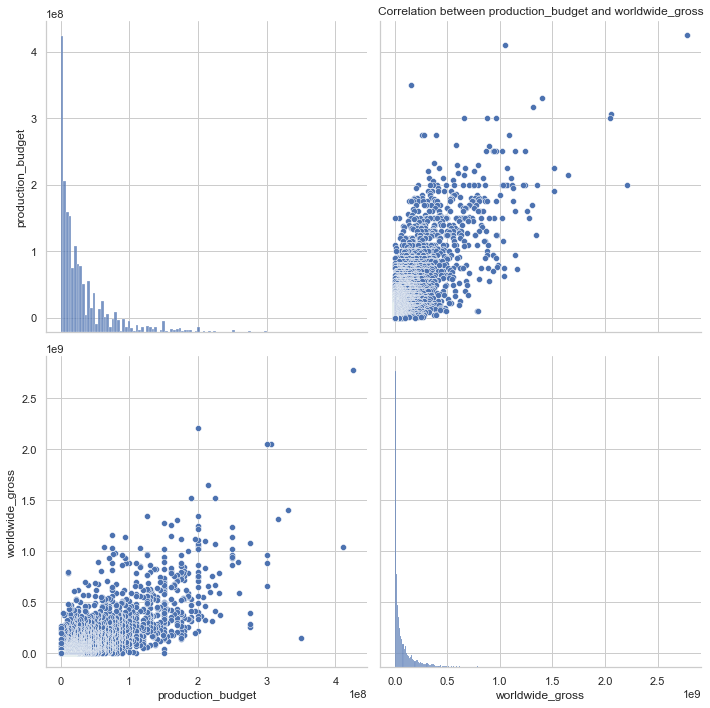

In [54]:
#Plot the correlation between domestic gross and total gross
sns.set(style='whitegrid')
sns.pairplot(roi_df, height= 5)
plt.title(f"Correlation between {roi_df.columns[0]} and {roi_df.columns[1]}")
plt.tight_layout()
plt.show();

In [ ]:
roi_df['production_budget'].corr(roi_df['total_gross'])

0.7399121495609355

The analysis shows a moderate to strong positive correlation between a film's production budget and its worldwide gross returns. 


## Conclusion
***
The analysis is considered a success, having answered all questions set out in the introduction.
From the results, I would recommend that the stakeholder considers creating films in Adventure, Action, Comedy and Drama genres. \
I would also reccommend that they consider investing higher production budgets as there is a positive correlation between the said budget and returns on investments

While this analysis gives a clear go-ahead, there could be more significant or  external environmental factors that could sway the decision reached herein otherwise. 
As I grow as a Data Scientist, I hope to learn more and later improve the code, reasoning and logic presented in this project. 

*Thank you for following along!*